# **Question 1**

**Round off error in long term integrations of planetary orbits**

Modelling the growth of the error over N operations as a random walk gives *Brouwer's Law*, which states that the total error after N steps will be $$ \approx \sqrt{N}\epsilon$$ where $\epsilon \sim 10^{-16}$ for a double precision float.

The *semi-implicit Euler method* involves updating the velocity and position of the planet from timestep *n* to timestep $n + 1$ according to
$$ v_{n+1} = v_n + a_n\Delta t$$
$$ x_{n+1} = x_n + v_{n+1}\Delta t$$

with r = radius of Earth from the Sun and $\mu$ is the gravitational parameter of the sun (also called $GM$).
In this scheme, the velocity is updated first using the acceleration, and then the value of position is updated using the new velocity.

### a) **Semi-Implicit Euler Method**
Write a code which uses the semi-implicit Euler method to follow the Earth's orbit around the sun. Integrate the orbit for 1 year and plot orbit in the x-y plane to check the Earth moves as expected.

Assume:
- $\mu \approx (GM)_{Sun} = 1.3271 \times 10^{20}$ N
- $1 AU = 1.496 \times 10^{11}$ m

$$F = ma = \frac{\mu m}{r^2}$$
$$ \therefore a = \frac{\mu}{r^2}$$


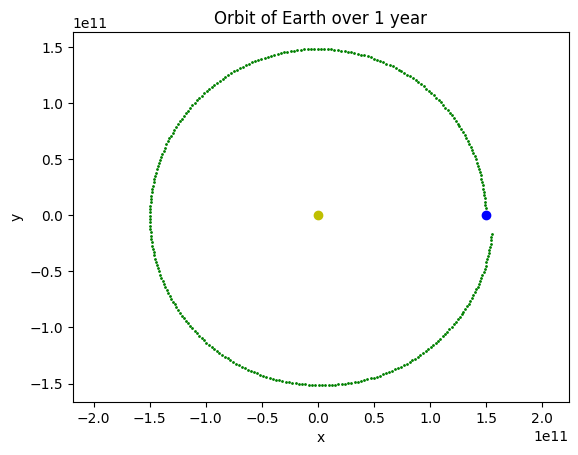

In [207]:
import numpy as np
import matplotlib.pyplot as plt

def update_v(v, a, x, dt):
    return v - a*x*dt

def update_x(x, v, dt):
    return x + v*dt

def e_k(vx, vy):
    m_earth = 5.972 * (10**24) # kg
    return 0.5 * m_earth * (vx**2 + vy**2)

def e_grav(mu, r):
    m_earth = 5.97219*10**24 # kilograms
    return mu*m_earth/r # Joules

def orbit(dt, plot = False):
    # Set Up Variables
    gm_Sun = 1.3271 * (10**20) # Newtons
    init_rad = 1.496 * (10**11) # Metres

    a = gm_Sun/init_rad**2 # m/s^2

    t = 365.256 * 24 * 60 * 60 # Seconds per year
    n = int(t/dt)

    # Set Up Arrays
    x = np.zeros(n)
    y = np.zeros(n)
    vx = np.zeros(n)
    vy = np.zeros(n)
    init_theta = 0

    vy[0] = np.sqrt(a*init_rad)
    x[0] = init_rad

    rad = init_rad
    theta = init_theta
    for i in range(n - 1):
        rad = np.sqrt(x[i]**2 + y[i]**2)
        a = gm_Sun/rad**2 # m/s^2

        vx[i + 1] = update_v(vx[i], a, np.cos(theta), dt)
        vy[i + 1] = update_v(vy[i], a, np.sin(theta), dt)

        x[i + 1] = update_x(x[i], vx[i + 1], dt)
        y[i + 1] = update_x(y[i], vy[i + 1], dt)

        # Recalculate theta
        
        if x[i] > 0:
            if y[i] < 0:
                theta = np.arctan(y[i+1]/x[i+1])
            else:
                theta = np.arctan(abs(y[i+1]/x[i+1]))
        else:
            theta = np.arctan(y[i+1]/x[i+1]) + np.pi
    
    init_e = e_k(vx[0], vy[0]) + e_grav(gm_Sun, rad)
    final_e = e_k(vx[-1], vy[-1]) + e_grav(gm_Sun, np.sqrt(x[-1]**2 + y[-1]**2))

    if plot == True:
        plt.plot(x, y, 'go', markersize = 1, label = 'Orbit Path')
        plt.plot(0, 0, 'yo', label = 'Sun')        #yellow marker for the sun
        plt.plot(x[0], 0, 'bo', label = 'Earth Initial Positon')  #dark blue marker for earth's initial position
        plt.axis('equal')
        plt.xlabel ('x')
        plt.ylabel ('y')
        plt.title("Orbit of Earth over 1 year")

    return init_e, final_e

__ = orbit(100000, plot = True)


### b) **Fractional Energy Change**

Using different timesteps $\Delta t$ ranging from $\Delta t = 0.1$ years to $\approx 10^{-9}$ years $(\approx 0.04 seconds)$, plot the fractional energy change $\frac{\Delta E}{E}$ against timestep $\Delta t$ and number of steps $N$.
$$\frac{\Delta E}{E} = \frac{E_{final} - E_{initial}}{E_{initial}}$$
$$E = E_{grav} + E_{kinetic} =\frac{GMm}{r} + {\frac{1}{2} mv^2} \approx \frac{\mu m}{r} + \frac{1}{2} mv^2$$

In [174]:
dt = 1

dt_list = []
e_f = []

while dt < (365.25*24*60*60)/100:
    dt_list.append(dt)
    ei, ef = orbit(dt, plot = False)
    e_f.append(ef)
    dt *= 10

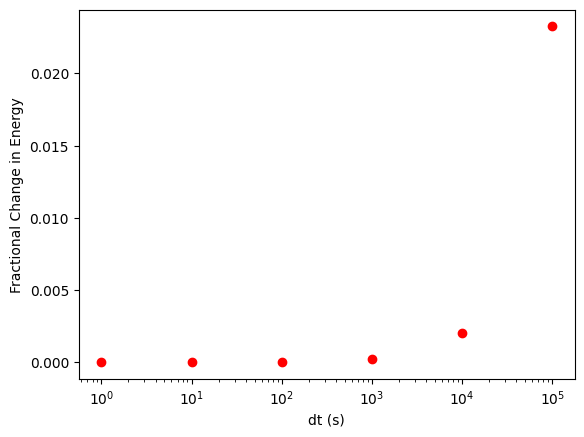

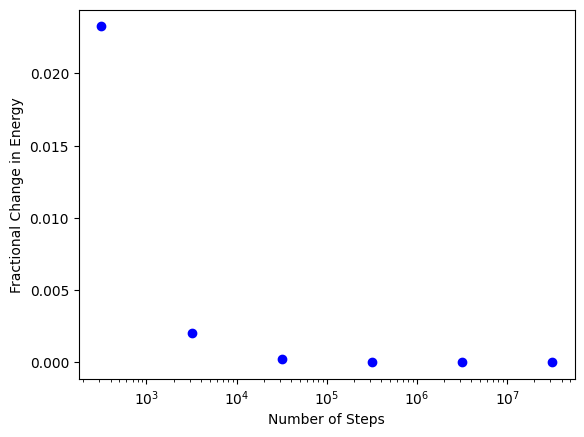

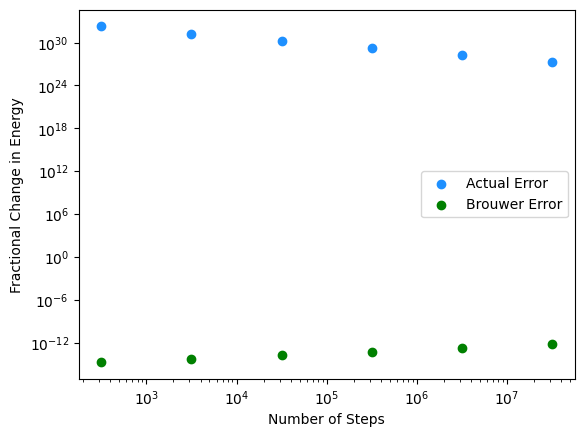

In [195]:
e_frac_change = abs(((np.array(e_f) - ei)/ei))
e_error = abs(np.array(e_f) - ei)
num_steps = ((365.25*24*60*60)/np.array(dt_list))
dt_list = np.array(dt_list)

# Brouwer's Law
brouwer_error = np.sqrt(num_steps)*(10**(-16))

plt.figure(1)
plt.scatter(dt_list, e_frac_change, label = "Time Step (s)", c = "r")
plt.xscale('log')
plt.xlabel('dt (s)')
plt.ylabel('Fractional Change in Energy')
#plt.legend()

plt.figure(2)
plt.scatter(num_steps, e_frac_change, label = "Number of Steps", c = "b")
plt.xscale('log')
plt.xlabel('Number of Steps')
plt.ylabel('Fractional Change in Energy')
#plt.legend()

plt.figure(3)
plt.scatter(num_steps, e_error, label = "Actual Error", c = "dodgerblue")
plt.scatter(num_steps, brouwer_error, label = "Brouwer Error", c = "g")
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Number of Steps')
plt.ylabel('Fractional Change in Energy')
plt.legend()


# **Question 2**

### a) **Interpolation and Thermodynamics**

The pressure and entropy per particle of an ideal gas are given by:
$$ P = nk_BT$$
$$S = k_B(\frac{5}{2} - ln(\frac{n}{nQ}))$$

where T is temperature, n is the number density of molecules, and $nQ = (mk_BT/2\pi\hbar^2)^{3/2}$ with m being the particle mass. Density ranges from $10^{-6}$ to 1 $kgm^{-3}$, and temperature ranges from 100 to 1000 K. Also, assume that m = $28m_u$, where $m_u = 1.67377 \times 10^{-27}$ kg is the atomic mass unit.

In [208]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

m = 28*1.67377*10**(-27) # Mean molecular mass of air in kg
kB = 1.38064852 * (10**(-23)) # Boltzmann Constant
h_bar = 1.0545718 * (10**(-34)) # Reduced Planck Constant

def calc_pressure(t, d):
    n = d/m # Number Density
    P = n*kB*t # Pressure
    return P

def calc_entropy(t, d):
    n = d/m # Number Density
    nQ = (m*kB*t/(2*np.pi*h_bar**2))**(3/2) # Quantum Concentration
    entropy = (5/2 - np.log(nQ/n))
    return entropy

def frac_error(actual, approx):
    frac_change = abs(actual - approx)
    if frac_change == 0:
        return 0
    else:
        return abs(frac_change/actual)

n_steps = 15
t_array = np.linspace(100, 1000, n_steps) # Temperature List in Kelvin
d_array = np.linspace(10**(-6), 1, n_steps) # Density List in kg/m^3

p_array = [[] for i in range(n_steps)]
s_array = [[] for i in range(n_steps)]

for i in range(len(t_array)):
    t = t_array[i]
    p = []
    s = []
    for d in d_array:
        p.append(calc_pressure(t, d))
        s.append(calc_entropy(t, d))
    p_array[i] = p
    s_array[i] = s

# Actual Values
full_t_array = np.linspace(100, 1000, 1000) # Full Temperature List in Kelvin
full_d_array = np.linspace(10**(-6), 1, 1000) # Full Density List in kg/m^3

full_p_array = [[] for i in range(len(full_t_array))]
full_s_array = [[] for i in range(len(full_t_array))]

for i in range(len(full_t_array)):
    t = full_t_array[i]
    p = []
    s = []
    for d in full_d_array:
        p.append(calc_pressure(t, d))
        s.append(calc_entropy(t, d))
    full_p_array[i] = p
    full_s_array[i] = s

interp_p_spline = sc.interpolate.RectBivariateSpline(d_array, t_array, p_array)
interp_p_array = interp_p_spline(full_d_array, full_t_array)

interp_s_spline = sc.interpolate.RectBivariateSpline(d_array, t_array, s_array)
interp_s_array = interp_s_spline(full_d_array, full_t_array)

p_frac_error = [[] for i in range(len(full_p_array))]
s_frac_error = [[] for i in range(len(full_s_array))]

for row_num in range(len(full_p_array)):
    temp_p = []
    temp_s = []

    for col_num in range(len(full_p_array[row_num])):
        temp_p.append(frac_error(full_p_array[row_num][col_num], interp_p_array[row_num][col_num]))
        temp_s.append(frac_error(full_s_array[row_num][col_num], interp_s_array[row_num][col_num]))
    
    p_frac_error[row_num] = temp_p
    s_frac_error[row_num] = temp_s

p_frac_error = np.array(p_frac_error)
s_frac_error = np.array(s_frac_error)

In [ ]:
mean_p_frac_error = np.mean(p_frac_error.flatten())

max_p_frac_error = mean_p_frac_error + 2*np.std(p_frac_error.flatten())

plt.figure(1)
plt.pcolormesh(full_d_array, full_t_array, p_frac_error, vmax = max_p_frac_error, cmap = "inferno")
plt.title("Pressure Fractional Error (Log Scale)")
plt.xlabel("Density (kg/m^3)")
plt.ylabel("Temperature (K)")
plt.colorbar()

plt.figure(2)
plt.pcolormesh(full_d_array, full_t_array, s_frac_error, cmap = "winter")
plt.title("Entropy Fractional Error")
plt.xlabel("Density (kg/m^3)")
plt.ylabel("Temperature (K)")
plt.colorbar()

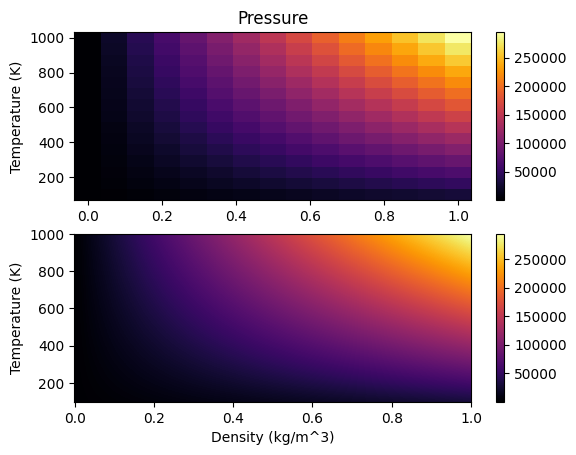

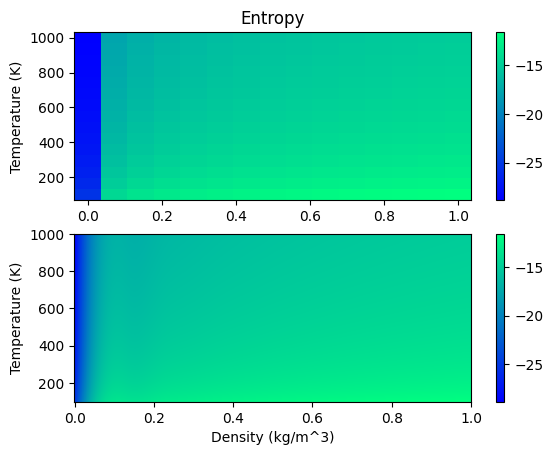

In [209]:
plt.figure(1)

plt.subplot(211)
plt.title("Pressure")
plt.ylabel("Temperature (K)")
plt.pcolormesh(d_array, t_array, p_array, cmap = "inferno")
plt.colorbar()

plt.subplot(212)
plt.pcolormesh(full_d_array, full_t_array, interp_p_array, cmap = "inferno")
plt.xlabel("Density (kg/m^3)")
plt.ylabel("Temperature (K)")
plt.colorbar()

plt.figure(2)

plt.subplot(211)
plt.title("Entropy")
plt.ylabel("Temperature (K)")
plt.pcolormesh(d_array, t_array, s_array, cmap = "winter")
plt.colorbar()

plt.subplot(212)
plt.pcolormesh(full_d_array, full_t_array, interp_s_array, cmap = "winter")
plt.xlabel("Density (kg/m^3)")
plt.ylabel("Temperature (K)")
plt.colorbar()

### b) **Thermodynamic Consistency**

Now check to what extent your interpolation is thermodynamically consistent: In terms of the Helmholtz free energy per particle $F = E - TS$, where $E = (3/2)k_BT$ is the internal energy per particle, the pressure and entropy are given by
$$ S = - \frac{\partial F}{\partial T}|_n $$
$$ P = n^2 \frac{\partial F}{\partial n}|_T $$

This implies that the entropy and pressure must satisfy the Maxwell relation:
$$ - \frac{\partial F}{\partial T}|_n = n^2 \frac{\partial F}{\partial n}|_T $$